# Data cleaning

In this section, we will perform an Exploratory Data Analysis (EDA) and data cleaning on the Human Resources dataset. Data cleaning is a crucial step in the data analysis process, as it preps the data for further analysis.Let's dive into the data and uncover insights that will guide our further analysis.

In [1]:
# Importing the libraries
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import json

In [2]:
base_dir = os.path.dirname(os.getcwd())
data_frame = pd.read_csv(os.path.join(base_dir, 'datasets', 'Human_Resources.csv'))
print("Number of rows: ",len(data_frame))
data_frame.head(5)

Number of rows:  1470


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


From displaying the dataframe head we can observe that the table consists of 35 columns and 1470 rows. Let's check the column types and if there are any nulls.

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Ok, it seems that all columns have valid entries and there are no missing values. But for safety purposes let's double check: 

Number of missing values: 
0


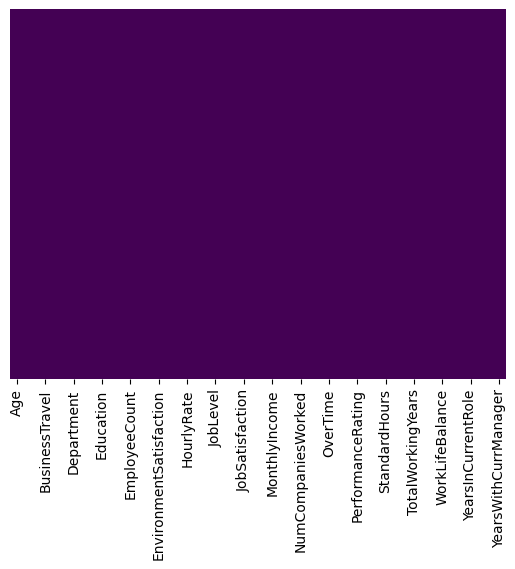

In [4]:
sns.heatmap(data_frame.isnull(), yticklabels=False, cbar=False, cmap='viridis')
print("Number of missing values: ")
print(data_frame.isnull().sum().sum())

We made sure there are not missing values. Now, it seems there are columns that do not change for any employee so we can drop them. 

In [5]:
invariant_columns = []

for col in data_frame.columns:
    if data_frame[col].nunique() == 1:
        invariant_columns.append(col)

data_frame.drop(columns=invariant_columns, inplace=True)
# Employee Number is not useful for the model
data_frame.drop(columns='EmployeeNumber', inplace=True)
print('Dropped columns: ', invariant_columns, 'EmployeeNumber')

Dropped columns:  ['EmployeeCount', 'Over18', 'StandardHours'] EmployeeNumber


In [6]:
object_columns = data_frame.select_dtypes(include=['object']).columns
unique_elements_dict = {}

for col in object_columns:
    unique_elements_dict[col] = {index: element for index, element in enumerate(data_frame[col].unique())}

# Ensure that 'Attrition' and 'OverTime' are assigned correctly
unique_elements_dict['Attrition'] = {0: 'No', 1: 'Yes'}
unique_elements_dict['OverTime'] = {0: 'No', 1: 'Yes'}

print(unique_elements_dict)

with open('unique_elements.json', 'w') as json_file:
    json.dump(unique_elements_dict, json_file)

# Save the unique elements dictionary to a file
for col in object_columns:
    data_frame[col] = data_frame[col].map({v: k for k, v in unique_elements_dict[col].items()})

{'Attrition': {0: 'No', 1: 'Yes'}, 'BusinessTravel': {0: 'Travel_Rarely', 1: 'Travel_Frequently', 2: 'Non-Travel'}, 'Department': {0: 'Sales', 1: 'Research & Development', 2: 'Human Resources'}, 'EducationField': {0: 'Life Sciences', 1: 'Other', 2: 'Medical', 3: 'Marketing', 4: 'Technical Degree', 5: 'Human Resources'}, 'Gender': {0: 'Female', 1: 'Male'}, 'JobRole': {0: 'Sales Executive', 1: 'Research Scientist', 2: 'Laboratory Technician', 3: 'Manufacturing Director', 4: 'Healthcare Representative', 5: 'Manager', 6: 'Sales Representative', 7: 'Research Director', 8: 'Human Resources'}, 'MaritalStatus': {0: 'Single', 1: 'Married', 2: 'Divorced'}, 'OverTime': {0: 'No', 1: 'Yes'}}


In [10]:
cleaned_data_path = os.path.join(base_dir, 'datasets', 'Cleaned_Human_Resources.csv')
data_frame.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")

Cleaned data saved to c:\github\human-resources-classification\datasets\Cleaned_Human_Resources.csv
